<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4

## Help Yelp

---

In this project you will be investigating a small version of the [Yelp challenge dataset](https://www.yelp.com/dataset_challenge). You'll practice using classification algorithms, cross-validation, gridsearching – all that good stuff.



---

### The data

There are 5 individual .csv files that have the information, zipped into .7z format like with the SF data last project. The dataset is located in your datasets folder:

    DSI-SF-2/datasets/yelp_arizona_data.7z

The columns in each are:

    businesses_small_parsed.csv
        business_id: unique business identifier
        name: name of the business
        review_count: number of reviews per business
        city: city business resides in
        stars: average rating
        categories: categories the business falls into (can be one or multiple)
        latitude
        longitude
        neighborhoods: neighborhoods business belongs to
        variable: "property" of the business (a tag)
        value: True/False for the property
        
    reviews_small_nlp_parsed.csv
        user_id: unique user identifier
        review_id: unique review identifier
        votes.cool: how many thought the review was "cool"
        business_id: unique business id the review is for
        votes.funny: how many thought the review was funny
        stars: rating given
        date: date of review
        votes.useful: how many thought the review was useful
        ... 100 columns of counts of most common 2 word phrases that appear in reviews in this review
        
    users_small_parsed.csv
        yelping_since: signup date
        compliments.plain: # of compliments "plain"
        review_count: # of reviews:
        compliments.cute: total # of compliments "cute"
        compliments.writer: # of compliments "writer"
        compliments.note: # of compliments "note" (not sure what this is)
        compliments.hot: # of compliments "hot" (?)
        compliments.cool: # of compliments "cool"
        compliments.profile: # of compliments "profile"
        average_stars: average rating
        compliments.more: # of compliments "more"
        elite: years considered "elite"
        name: user's name
        user_id: unique user id
        votes.cool: # of votes "cool"
        compliments.list: # of compliments "list"
        votes.funny: # of compliments "funny"
        compliments.photos: # of compliments "photos"
        compliments.funny: # of compliments "funny"
        votes.useful: # of votes "useful"
       
    checkins_small_parsed.csv
        business_id: unique business identifier
        variable: day-time identifier of checkins (0-0 is Sunday 0:00 - 1:00am,  for example)
        value: # of checkins at that time
    
    tips_small_nlp_parsed.csv
        user_id: unique user identifier
        business_id: unique business identifier
        likes: likes that the tip has
        date: date of tip
        ... 100 columns of counts of most common 2 word phrases that appear in tips in this tip

The reviews and tips datasets in particular have parsed "NLP" columns with counts of 2-word phrases in that review or tip (a "tip", it seems, is some kind of smaller review).

The user dataset has a lot of columns of counts of different compliments and votes. I'm not sure whether the compliments or votes are _by_ the user or _for_ the user.

---

If you look at the website, or the full data, you'll see I have removed pieces of the data and cut it down quite a bit. This is to simplify it for this project. Specifically, business are limited to be in these cities:

    Phoenix
    Surprise
    Las Vegas
    Waterloo

Apparently there is a city called "Surprise" in Arizona. 

Businesses are also restricted to at least be in one of the following categories, because I thought the mix of them was funny:

    Airports
    Breakfast & Brunch
    Bubble Tea
    Burgers
    Bars
    Bakeries
    Breweries
    Cafes
    Candy Stores
    Comedy Clubs
    Courthouses
    Dance Clubs
    Fast Food
    Museums
    Tattoo
    Vape Shops
    Yoga
    
---

### Project requirements

**You will be performing 4 different sections of analysis, like in the last project.**

Remember that classification targets are categorical and regression targets are continuous variables.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Constructing a "profile" for Las Vegas

---

Yelp is interested in building out what they are calling "profiles" for cities. They want you to start with just Las Vegas to see what a prototype of this would look like. Essentially, they want to know what makes Las Vegas distinct from the other four.

Use the data you have to predict Las Vegas from the other variables you have. You should not be predicting the city from any kind of location data or other data perfectly associated with that city (or another city).

You may use any classification algorithm you deem appropriate, or even multiple models. You should:

1. Build at least one model predicting Las Vegas vs. the other cities.
- Validate your model(s).
- Interpret and visualize, in some way, the results.
- Write up a "profile" for Las Vegas. This should be a writeup converting your findings from the model(s) into a human-readable description of the city.

In [2]:
import pandas as pd
import numpy as np

#======================= Import business information
filepath = '../../datasets/yelp_arizona_data/businesses_small_parsed.csv'
biz = pd.read_csv(filepath)

#======================= Import checkin information
filepath = '../../datasets/yelp_arizona_data/checkins_small_parsed.csv'
chkin = pd.read_csv(filepath)

#======================= Reviews
filepath = '../../datasets/yelp_arizona_data/reviews_small_nlp_parsed.csv'
review = pd.read_csv(filepath)

#======================= Small reviews (tip)
filepath = '../../datasets/yelp_arizona_data/tips_small_nlp_parsed.csv'
tips = pd.read_csv(filepath)




filepath = '../../datasets/yelp_arizona_data/users_small_parsed.csv'
users = pd.read_csv(filepath)


In [3]:
print biz.shape, chkin.shape, review.shape, tips.shape, users.shape

(152832, 11) (214299, 3) (322398, 108) (101991, 104) (144206, 21)


In [134]:
tips.columns.values

array(['user_id', 'business_id', 'likes', 'date', '24 hours',
       'amazing food', 'animal style', 'awesome food', 'awesome place',
       'awesome service', 'beef hash', 'beer selection', 'best breakfast',
       'best burger', 'best burgers', 'best place', 'bloody mary',
       'bottle service', 'carne asada', 'cheese fries', 'chicken waffles',
       'come early', 'cool place', 'corned beef', 'customer service',
       'delicious food', 'don come', 'don forget', 'eggs benedict',
       'excellent food', 'excellent service', 'fast food', 'fast service',
       'favorite place', 'feel like', 'fish chips', 'food amazing',
       'food awesome', 'food drinks', 'food good', 'food great',
       'food service', 'free wifi', 'french toast', 'fried chicken',
       'friendly service', 'friendly staff', 'gluten free', 'good food',
       'good place', 'good service', 'great atmosphere', 'great beer',
       'great breakfast', 'great burgers', 'great customer',
       'great drinks', 'great

In [4]:
# hypothesis-- the day and the number of checkins are a strong predictor 
# for determining what city we are talking about
# if a days checks are collected by hour, there is a strong predictor
# to the related city

# cleaning the data

#adding the city to the checkin table
clean = chkin.merge(biz[['business_id','city']], on='business_id', how='inner')

#adding the las_vegas yes or no flag
clean['vegas_flag'] = clean['city'].map( lambda x : 1 if x=='Las Vegas' else 0)
city_key = {
    'Phoenix': 3 
    , 'Surprise': 2
    , 'Las Vegas': 1
    , 'Waterloo': 4  
}

#adding some additional fields, extracting the day and the time of day into separate fields
clean['cityint'] = clean['city'].map( lambda x : city_key[x])
clean['vegas_flag'] = clean['city'].map( lambda x : 1 if x=='Las Vegas' else 0)
clean['weekday'] = clean['variable'].map( lambda x : int(x.split('-')[-1]))
clean['time24'] = clean['variable'].map( lambda x : int(x.split('-')[0].split('.')[-1]))
print clean.head(5)


              business_id          variable  value     city  vegas_flag  \
0  SG_gEmEXL4ID6RAEinC5Bg  checkin_info.9-0    1.0  Phoenix           0   
1  SG_gEmEXL4ID6RAEinC5Bg  checkin_info.9-0    1.0  Phoenix           0   
2  SG_gEmEXL4ID6RAEinC5Bg  checkin_info.9-0    1.0  Phoenix           0   
3  SG_gEmEXL4ID6RAEinC5Bg  checkin_info.9-0    1.0  Phoenix           0   
4  SG_gEmEXL4ID6RAEinC5Bg  checkin_info.9-0    1.0  Phoenix           0   

   cityint  weekday  time24  
0        3        0       9  
1        3        0       9  
2        3        0       9  
3        3        0       9  
4        3        0       9  


In [6]:
clean.shape

# summarizing check ins by 
for_plot = clean.groupby(['time24','cityint','vegas_flag','weekday'])[['value']].sum()
for_plot.reset_index(inplace=True)

#normalizing the value which is the checkin count. doing this manually
#since it is only one field
for_plot['chkin_ct_norm'] = for_plot['value'] / for_plot['value'].mean()

#normalized dataset
for_plot.head(5)


,time24,cityint,vegas_flag,weekday,value,chkin_ct_norm
0,0,1,1,0,172464.0,1.758266
1,0,1,1,1,121715.0,1.240881
2,0,1,1,2,122147.0,1.245286
3,0,1,1,3,142917.0,1.457035
4,0,1,1,4,194896.0,1.986960


In [7]:
# splitting the data
import patsy
from sklearn.cross_validation import train_test_split
formula = 'vegas_flag ~ time24 + weekday + chkin_ct_norm-1'
y, X = patsy.dmatrices(formula,for_plot)


# setting up for cross validation
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, stratify =y)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# modeling
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(cv=5)
lr_model = lr.fit(X_train,y_train)
score = lr_model.score(X_test, y_test)

#scoring the model
print score
probabilities = lr_model.predict_proba(X_test)


0.9


In [ ]:
#plots of checkins by hour for each city

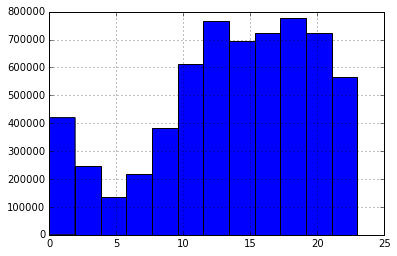

In [8]:
# =========== VEGAS======================
import matplotlib.pyplot as plt
%matplotlib inline
clean[clean.cityint==1].time24.hist(bins =12)


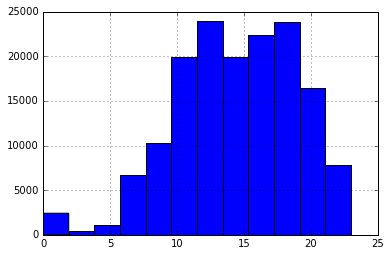

In [9]:
# =========== SURPRISE======================
clean[clean.cityint==2].time24.hist(bins =12)


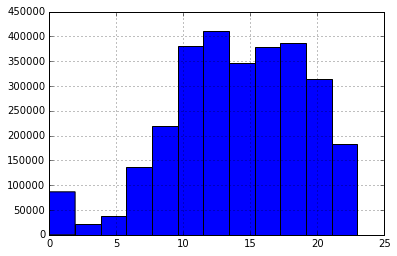

In [10]:
# =========== Phoenix ======================
clean[clean.cityint==3].time24.hist(bins =12)


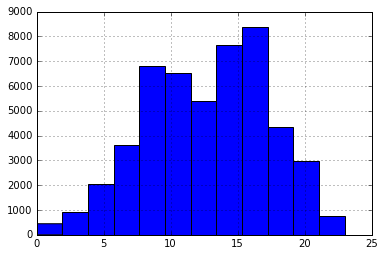

In [11]:
# =========== Waterloo ======================
clean[clean.cityint==4].time24.hist(bins =12)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Different categories of ratings

---

Yelp is finally ready to admit that their rating system sucks. No one cares about the ratings, they just use the site to find out what's nearby. The ratings are simply too unreliable for people. 

Yelp hypothesizes that this is, in fact, because different people tend to give their ratings based on different things. They believe that perhaps some people always base their ratings on quality of food, others on service, and perhaps other categories as well. 

1. Do some users tend to talk about service more than others in reviews/tips? Divide up the tips/reviews into more "service-focused" ones and those less concerned with service.
2. Create two new ratings for businesses: ratings from just the service-focused reviews and ratings from the non-service reviews.
3. Construct a regression model for each of the two ratings. They should use the same predictor variables (of your choice). 
4. Validate the performance of the models.
5. Do the models coefficients differ at all? What does this tell you about the hypothesis that there are in fact two different kinds of ratings?

In [76]:
#print review.columns.values
#================================= LONGEST BLOCK - ONLY RERUN WHEN NECESSARY
'''
['user_id' 'review_id' 'votes.cool' 'business_id' 'votes.funny' 'stars'
 'date' 'votes.useful' '10 minutes' '15 minutes' '20 minutes' '30 minutes'
 'bar food' 'beer selection' 'best ve' 'bloody mary' 'bottle service'
 'chicken waffles' 'customer service' 'dance floor' 'decided try'
 'definitely come' 'definitely recommend' 'didn want' 'don know' 'don like'
 'don think' 'don want' 'eggs benedict' 'fast food' 'feel like' 'felt like'
 'fish chips' 'food amazing' 'food came' 'food delicious' 'food good'
 'food great' 'food just' 'food service' 'french fries' 'french toast'
 'friday night' 'fried chicken' 'friendly staff' 'good food' 'good place'
 'good service' 'good thing' 'good time' 'great atmosphere'
 'great experience' 'great food' 'great place' 'great service' 'great time'
 'happy hour' 'hash browns' 'highly recommend' 'hip hop' 'ice cream'
 'just like' 'just ok' 'just right' 'las vegas' 'late night' 'like place'
 'little bit' 'long time' 'looked like' 'looks like' 'love place'
 'mac cheese' 'make sure' 'mashed potatoes' 'medium rare' 'minutes later'
 'new york' 'onion rings' 'place good' 'place great' 'place just'
 'potato fries' 'pretty good' 'quality food' 'really enjoyed' 'really good'
 'really like' 'really nice' 'recommend place' 'red velvet' 'right away'
 'saturday night' 'second time' 'service excellent' 'service food'
 'service friendly' 'service good' 'service great' 'staff friendly'
 'super friendly' 'sweet potato' 'tasted like' 'time vegas' 'try place'
 've seen' 've tried' 'wait staff']
'''
print review.shape
#=================== IDENTIFYING THE KEY HEADINGS
standard_columns = ['user_id', 'review_id', 'business_id','stars', 'date']

#=================== IDENTIFYING THE SERVICE RELATED HEADINGS
service_columns = ['10 minutes', '15 minutes',
       '20 minutes', '30 minutes','customer service','food came','food service','friendly staff','good service',  'friendly staff',
                   'great experience','great service','right away','service excellent', 'service food',
       'service friendly', 'service good', 'service great',
       'staff friendly', 'super friendly'
                  ]
#=================== IDENTIFYING THE NONSERVICE RELATED COLUMNS (BY EXCLUSION)
nonservice_columns = [x for x in review.columns.values if (x not in standard_columns) & (x not in service_columns) & (x not in ['service','nonservice'])]
#review['service_revs'] = review.apply(lambda x: sum([x for x in x.loc[:,service_columns]]) , axis=0)
#review['nonservice_revs']

#=================== IDENTIFYING THE FOOD RELATED COLUMNS (BY EXCLUSION)
food_columns = [x for x in review.columns.values if 'food' in x]
print food_columns

# flagging different reviews as SERVICE / NONSERVICE/ FOOD 
review_head = review
print 'starting first column'
review_head['service'] = review_head.apply( lambda x: sum([a for a in x[service_columns]]), axis=1)
print 'starting 2nd column'
review_head['nonservice'] = review_head.apply( lambda x: sum([a for a in x[nonservice_columns]]), axis=1)
print 'starting 3nd column'
review_head['food'] = review_head.apply( lambda x: sum([a for a in x[food_columns]]), axis=1)
print review_head.head(10)

#sum(review.ix[0,service_columns])

(322398, 110)
['bar food', 'fast food', 'food amazing', 'food came', 'food delicious', 'food good', 'food great', 'food just', 'food service', 'good food', 'great food', 'quality food', 'service food']
starting first column
starting 2nd column
starting 3nd column
                  user_id               review_id  votes.cool  \
0  o_LCYay4uo5N4eq3U5pbrQ  biEOCicjWlibF26pNLvhcw           0   
1  sEWeeq41k4ohBz4jS_iGRw  tOhOHUAS7XJch7a_HW5Csw           3   
2  1AqEqmmVHgYCuzcMrF4h2g  2aGafu-x7onydGoDgDfeQQ           0   
3  pv82zTlB5Txsu2Pusu__FA  CY4SWiYcUZTWS_T_cGaGPA           4   
4  jlr3OBS1_Y3Lqa-H3-FR1g  VCKytaG-_YkxmQosH4E0jw           0   
5  TR2YFVnIM5UM38RuMy6dcw  HUbubdE18goGYElee83hMw           0   
6  trdsekNRD-gIs50EBrScwA  XFJ7N6UDMwCUR-WvFzADPg           0   
7  PnsKyueIKIIimnRGo0niWw  oOYyD6oLLKPm-lj9H9whSw           0   
8  8leVoQakIF9OfyikF7Yu5g  WwWdhzdTyef9vFBIQhm1Pw           0   
9  lGROEmEZaINjHghhViWdeQ  C85618PrjV1lUBUyWaFksA           0   

              busine

In [74]:
# columns for food (later)
food_columns = [x for x in review.columns.values if 'food' in x]
print food_columns

['bar food', 'fast food', 'food amazing', 'food came', 'food delicious', 'food good', 'food great', 'food just', 'food service', 'good food', 'great food', 'quality food', 'service food']


In [77]:
# more formatting for a smaller table
shorter_review = review_head[['user_id','business_id','review_id','stars','service','nonservice']].copy()
shorter_review['service_or_non'] = shorter_review.apply(lambda x: 1 if x['service']>=x['nonservice'] else 0,axis=1)
shorter_review.head()

,user_id,business_id,review_id,stars,service,nonservice,service_or_non
0,o_LCYay4uo5N4eq3U5pbrQ,EmzaQR5hQlF0WIl24NxAZA,biEOCicjWlibF26pNLvhcw,3,0,1,0
1,sEWeeq41k4ohBz4jS_iGRw,EmzaQR5hQlF0WIl24NxAZA,tOhOHUAS7XJch7a_HW5Csw,2,0,18,0
2,1AqEqmmVHgYCuzcMrF4h2g,EmzaQR5hQlF0WIl24NxAZA,2aGafu-x7onydGoDgDfeQQ,2,0,2,0
3,pv82zTlB5Txsu2Pusu__FA,EmzaQR5hQlF0WIl24NxAZA,CY4SWiYcUZTWS_T_cGaGPA,2,0,19,0
4,jlr3OBS1_Y3Lqa-H3-FR1g,EmzaQR5hQlF0WIl24NxAZA,VCKytaG-_YkxmQosH4E0jw,4,0,2,0


In [79]:
# more formatting for a smaller table
summarized = shorter_review.groupby(['user_id','service_or_non'])[['review_id']].count()
summarized.reset_index(inplace=True)
print summarized.head()

#===== PIVOTING BY USERIDS SO WE CAN SEE SERVICE VS. NON SERVICE TYPE REVIEWS
pvt = summarized.pivot(index='user_id',columns='service_or_non',values='review_id')
pvt.reset_index(inplace=True)
pvt.fillna(0,inplace=True)

#===== EVALUATING IF USERS DO MORE SERVICE RELATED RATINGS OR NONSERVICE RELATED REVIEWS
pvt['service_or_non'] = pvt.apply(lambda x: 1 if x[1] >= x[0] else 0,axis=1) 
pvt.head()

# users making more service related reviews or not?
pvt.service_or_non.value_counts()
# users with more Non-service dominated reviews- 0    104640
# users with more service related reviews ------ 1     39566

                  user_id  service_or_non  review_id
0  --0HEXd4W6bJI8k7E0RxTA               0          1
1  --2QZsyXGz1OhiD4-0FQLQ               0          1
2  --4TkB_iDShmg41Y_QW9nw               0          6
3  --4TkB_iDShmg41Y_QW9nw               1          4
4  --4fX3LBeXoE88gDTK6TKQ               0          5


0    93629
1    50577
Name: service_or_non, dtype: int64

In [80]:
#===== DOES SERVICE AND NON-SERVICE OVERLAP? OR ARE THEY MUTUALLY EXCLUSIVE?
temp3 = review.groupby(['service','nonservice'])[['user_id']].count()
temp3.reset_index(inplace=True)
temp3['service_type'] = temp3.apply(lambda x : 'both - service' if (x.service > x.nonservice) & (x.nonservice >0) else 'both - service' if (x.service < x.nonservice) & (x.service >0) else 'nonservice' if (x.service == 0) & (x.nonservice > 0) else 'service' if (x.service >0) &(x.nonservice==0) else 'none'  ,axis=1)
print temp3.groupby('service_type')[['user_id']].sum()

                user_id
service_type           
both - service    45494
none              70395
nonservice       193655
service           12854


In [90]:
# ratings from service, ratings from non
shorter_review.head()

#Construct a regression model for each of the two ratings. 
#They should use the same predictor variables (of your choice).

test1 = service_columns[:]
#test1.insert(0,'review_id')
test1.append('service')

test2 = food_columns[:]
#test2.insert(0,'review_id')
test2.append('food')

#===========================================================================
#by review use service columns to predict if it is a service relate Review 
#(some cases overrided by non-service columns)
# can predict if a service related review
#===========================================================================

# cleaning the data keys and values
service_df = review[test1].copy()
service_df['service_yn'] = service_df.service.map(lambda x: 1 if x>0 else 0)
service_df.columns = [a.replace(' ','_').replace('.','_').replace('10','ten').replace('20','twenty').replace('15','fifteen').replace('30','thirty') for a in service_df.columns]
service_df.head()

# splitting and preparing the data
formula = 'service_yn ~' + '+'.join([a for a in service_df.columns if a not in ['service','service_yn']]) + '-1'
y, X = patsy.dmatrices(formula, service_df)
y = np.ravel(y)
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.3)

#---Modeling
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
lr = LinearRegression()
score = cross_val_score(lr, X_train,y_train,cv=5)

#---printing
print 'Service regression approximation'
print 'Formula: ', formula
print 'logistic regresion score:',np.mean(score), score
print 'baseline service vs. total:', y.mean()
print '-'*60

#===========================================================================
#by review use non-service columns to predict if a nonservice column
# can predict if a nonservice review based on the words used.
#===========================================================================

# cleaning the data keys and values
food_df = review[test2].copy()
food_df['food_yn'] = food_df.food.map(lambda x: 1 if x>0 else 0)
food_df.columns = [a.replace(' ','_').replace('.','_').replace('10','ten').replace('20','twenty').replace('15','fifteen').replace('30','thirty') for a in food_df.columns]
food_df.head()

# splitting and preparing the data
foodformula = 'food_yn ~' + '+'.join([a for a in food_df.columns if a not in ['food','food_yn']]) + '-1'
y, X = patsy.dmatrices(foodformula, food_df)
y = np.ravel(y)
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.3)

#---Modeling
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
lr = LinearRegression()
score = cross_val_score(lr, X_train,y_train,cv=5)

#---printing
print 'food regression approximation'
print 'formula:', foodformula
print 'logistic regresion score:', np.mean(score), score
print 'baseline service vs. total:',y.mean()
print '-'*60


Service regression approximation
Formula:  service_yn ~ten_minutes+fifteen_minutes+twenty_minutes+thirty_minutes+customer_service+food_came+food_service+friendly_staff+good_service+friendly_staff+great_experience+great_service+right_away+service_excellent+service_food+service_friendly+service_good+service_great+staff_friendly+super_friendly-1
logistic regresion score: 0.79928395312 [ 0.80148129  0.79773738  0.79457082  0.79696539  0.80566488]
baseline service vs. total: 0.225956736704
------------------------------------------------------------
food regression approximation
formula: food_yn ~bar_food+fast_food+food_amazing+food_came+food_delicious+food_good+food_great+food_just+food_service+good_food+great_food+quality_food+service_food-1
logistic regresion score: 0.824768222869 [ 0.82787763  0.82444434  0.82536173  0.81960675  0.82655066]
baseline service vs. total: 0.176418588205
------------------------------------------------------------


In [93]:
# possibility 2 - do a regression model on the following combinations:
# service reviews ---> stars
# nonservice reviews ---> stars


review.stars.unique()
# since the ratings are discrete, we will use logistic regression like a classification
# array([3, 2, 4, 5, 1])

# =============================================================================
# test 3 - are service fields better at predicting ratings?
# =============================================================================
test3 = service_columns[:]
#test1.insert(0,'review_id')
test3.append('stars')


# cleaning the data keys and values -- only looking at service related reviews
service_df = review.loc[review['service']>0,test3].copy()
service_df.columns = [a.replace(' ','_').replace('.','_').replace('10','ten').replace('20','twenty').replace('15','fifteen').replace('30','thirty') for a in service_df.columns]
service_df.head()

# splitting and preparing the data
formula = 'stars ~' + '+'.join([a for a in service_df.columns if a not in ['service','service_yn','stars']]) + '-1'
y, X = patsy.dmatrices(formula, service_df)
y = np.ravel(y)
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.3)

#---Modeling
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, LassoCV, Lasso
from sklearn.cross_validation import cross_val_score
lr = LinearRegression()
score = cross_val_score(lr, X_train,y_train,cv=5)

#---printing
print 'Service regression approximation'
print 'Formula: ', formula
print 'linear regresion score:',np.mean(score), score
print '-'*60



Service regression approximation
Formula:  stars ~ten_minutes+fifteen_minutes+twenty_minutes+thirty_minutes+customer_service+food_came+food_service+friendly_staff+good_service+friendly_staff+great_experience+great_service+right_away+service_excellent+service_food+service_friendly+service_good+service_great+staff_friendly+super_friendly-1
logistic regresion score: 0.213192429293 [ 0.21326549  0.21762089  0.21500585  0.20010554  0.21996438]
------------------------------------------------------------


In [95]:

# =============================================================================
# test 4 - are food fields better at predicting ratings?
# =============================================================================

test4 = food_columns[:]
#test2.insert(0,'review_id')
test4.append('stars')


# cleaning the data keys and values
food_df = review.loc[review['food']>0,test4].copy()
food_df.columns = [a.replace(' ','_').replace('.','_').replace('10','ten').replace('20','twenty').replace('15','fifteen').replace('30','thirty') for a in food_df.columns]
food_df.head()

# splitting and preparing the data
foodformula = 'stars ~' + '+'.join([a for a in food_df.columns if a not in ['food','stars','food_yn']]) + '-1'
print foodformula
y, X = patsy.dmatrices(foodformula, food_df)
y = np.ravel(y)
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.3)

print 'Modeling test 4 --'
#---Modeling
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, LassoCV, Lasso
from sklearn.cross_validation import cross_val_score
lr = LinearRegression()
score = cross_val_score(lr, X_train,y_train,cv=5)

#---printing
print 'non service regression approximation'
print 'formula:', foodformula
print 'logistic regresion score:', np.mean(score), score
print '-'*60



stars ~bar_food+fast_food+food_amazing+food_came+food_delicious+food_good+food_great+food_just+food_service+good_food+great_food+quality_food+service_food-1
Modeling test 4 --
non service regression approximation
formula: stars ~bar_food+fast_food+food_amazing+food_came+food_delicious+food_good+food_great+food_just+food_service+good_food+great_food+quality_food+service_food-1
logistic regresion score: 0.120012170922 [ 0.1231078   0.12148428  0.10847615  0.11678357  0.13020906]
------------------------------------------------------------


In [ ]:
# discussion 

'''
TEST 1:As noted before, using the service fields to predict if it was a service review
shows a strong predictor score, as the service rating flag is a directly a derived field
The R^2 for that dataset is 0.72 -- results are not useful

TEST 2: similar to test 1, food related columns are a strong predictor to determine
if the review is food related R2 = 0.82. As expected there's a strong prediction factor
because the target is a derived field of the source -- results are not useful

TEST 3: using only service columns to predict gave a moderate correlation to the various categories. 
There's a R2 of about .21 using the service columns to predict rates. Which means service alone
isnt the strongest predictor

TESTS 4: the food columns only predict stars on a 0.12 R^2 rating under a cross validation of CV=5
showing a weak rating between food comments in the review and the actual star rating

'''

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Identifying "elite" users

---

Yelp, though having their own formula for determining whether a user is elite or not, is interested in delving deeper into what differentiates an elite user from a normal user at a broader level.

Use a classification model to predict whether a user is elite or not. Note that users can be elite in some years and not in others.

1. What things predict well whether a user is elite or not?
- Validate the model.
- If you were to remove the "counts" metrics for users (reviews, votes, compliments), what distinguishes an elite user, if anything? Validate the model and compare it to the one with the count variables.
- Think of a way to visually represent your results in a compelling way.
- Give a brief write-up of your findings.


In [109]:
# predicting elite users
# visits to businesses
# reviews made
# checkins made

# clean data load
filepath = '../../datasets/yelp_arizona_data/users_small_parsed.csv'
users = pd.read_csv(filepath)

# create elite flag --------
users['elite_flag'] = users.elite.map(lambda x : 1 if len(x)> 2 else 0)

#clean up headings
users.columns = [x.replace('.','_').replace(' ','_') for x in users.columns]

#fill NA's with zeros -- most of them 
users.fillna(0.0,inplace=True)

print users.shape
print users.info()
print users.columns.values
users.head(5)

(144206, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144206 entries, 0 to 144205
Data columns (total 22 columns):
yelping_since          144206 non-null object
compliments_plain      144206 non-null float64
review_count           144206 non-null int64
compliments_cute       144206 non-null float64
compliments_writer     144206 non-null float64
fans                   144206 non-null int64
compliments_note       144206 non-null float64
compliments_hot        144206 non-null float64
compliments_cool       144206 non-null float64
compliments_profile    144206 non-null float64
average_stars          144206 non-null float64
compliments_more       144206 non-null float64
elite                  144206 non-null object
name                   144206 non-null object
user_id                144206 non-null object
votes_cool             144206 non-null int64
compliments_list       144206 non-null float64
votes_funny            144206 non-null int64
compliments_photos     144206 non-null flo

,yelping_since,compliments_plain,review_count,compliments_cute,compliments_writer,fans,compliments_note,compliments_hot,compliments_cool,compliments_profile,...,elite,name,user_id,votes_cool,compliments_list,votes_funny,compliments_photos,compliments_funny,votes_useful,elite_flag
0,2004-10,959.0,1274,206.0,327.0,1179,611.0,1094.0,1642.0,116.0,...,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",Jeremy,rpOyqD_893cqmDAtJLbdog,11093,38.0,7681,330.0,580.0,14199,1
1,2004-10,89.0,442,23.0,24.0,100,83.0,101.0,145.0,9.0,...,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",Michael,4U9kSBLuBDU391x6bxU-YA,732,4.0,908,24.0,120.0,1483,1
2,2004-10,2.0,66,2.0,2.0,4,1.0,1.0,1.0,0.0,...,[2005],Katherine,SIBCL7HBkrP4llolm4SC2A,13,0.0,11,0.0,0.0,34,1
3,2004-10,5.0,101,1.0,3.0,7,3.0,5.0,4.0,1.0,...,[],Nader,UTS9XcT14H2ZscRIf0MYHQ,49,0.0,53,1.0,8.0,243,0
4,2004-10,104.0,983,82.0,17.0,78,85.0,265.0,212.0,9.0,...,"[2005, 2006, 2007, 2008, 2010, 2011, 2012]",Helen,ZWOj6LmzwGvMDh-A85EOtA,1928,3.0,1109,57.0,70.0,2404,1


In [124]:
#====================================================================
# Initial assumption WITH COUNTS AND COMPLIMENTS
#
#====================================================================

formula = 'elite_flag ~ review_count + fans + compliments_cool + votes_cool + votes_useful'

#normalize the chosen fields
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale =['review_count','fans','compliments_cool','votes_cool','votes_useful','average_stars']
users[columns_to_scale] = scaler.fit_transform(users[columns_to_scale])
print users[columns_to_scale].head(5)

#split the columns
y, X = patsy.dmatrices(formula, users)
y = np.ravel(y)
print X.shape, y.shape

#prepare for cross validation
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#try the model
lr = LogisticRegressionCV(cv=5)
lr_model = lr.fit(X_train, y_train)
score = lr_model.score(X_test,y_test)
print score

print '='*60
print 'Coefficients'
for x,y in zip(columns_to_scale,lr_model.coef_[0]):
    print y,'\t\t\t', x



   review_count       fans  compliments_cool  votes_cool  votes_useful  \
0      8.804729  66.604579         12.660351   19.713855     20.976851   
1      2.795421   5.495913          1.037211    1.184379      2.036296   
2      0.079676   0.058998         -0.080847   -0.101472     -0.121998   
3      0.332472   0.228901         -0.057554   -0.037090      0.189309   
4      6.702916   4.249953          1.557418    3.323289      3.408131   

   average_stars  
0      -0.131211  
1      -0.203948  
2       0.038508  
3      -0.228193  
4       0.305209  
(144206, 6) (144206,)
0.943103806948
Coefficients
-0.0132918966496 			review_count
1.81275137708 			fans
1.78732377341 			compliments_cool
1.66503585162 			votes_cool
-3.7596915424 			votes_useful
4.5003174355 			average_stars


In [116]:
# ====================================================================
# If you were to remove the "counts" metrics for users (reviews, votes, compliments), 
# what distinguishes an elite user, if anything? Validate the model and compare 
# it to the one with the count variables
#
# ADD A FIELD FOR "HOW MANY BUSINESSES VISITED?"
# ====================================================================

user_review_df = review.groupby(['user_id','business_id'])[['review_id']].count()
user_review_df.reset_index(inplace=True)
user_cts = user_review_df.groupby('user_id')[['business_id']].count()
user_cts.reset_index(inplace=True)
user_cts.rename(columns={'business_id':'unique_bus_reviews'},inplace=True)
user_mod = users[['elite_flag','user_id','average_stars','fans']].merge(user_cts, on='user_id', how='left')

#normalizing the new columns
user_mod['unique_bus_reviews'] = user_mod['unique_bus_reviews']/user_mod['unique_bus_reviews'].mean()
user_mod.head()

,elite_flag,user_id,average_stars,fans,unique_bus_reviews
0,1,rpOyqD_893cqmDAtJLbdog,-0.131211,66.604579,1.842906
1,1,4U9kSBLuBDU391x6bxU-YA,-0.203948,5.495913,0.460726
2,1,SIBCL7HBkrP4llolm4SC2A,0.038508,0.058998,0.460726
3,0,UTS9XcT14H2ZscRIf0MYHQ,-0.228193,0.228901,7.371623
4,1,ZWOj6LmzwGvMDh-A85EOtA,0.305209,4.249953,2.764359


In [128]:
'''
yelping_since          144206 non-null object
compliments_plain      144206 non-null float64
review_count           144206 non-null int64
compliments_cute       144206 non-null float64
compliments_writer     144206 non-null float64
fans                   144206 non-null int64
compliments_note       144206 non-null float64
compliments_hot        144206 non-null float64
compliments_cool       144206 non-null float64
compliments_profile    144206 non-null float64
average_stars          144206 non-null float64
compliments_more       144206 non-null float64
elite                  144206 non-null object
name                   144206 non-null object
user_id                144206 non-null object
votes_cool             144206 non-null int64
compliments_list       144206 non-null float64
votes_funny            144206 non-null int64
compliments_photos     144206 non-null float64
compliments_funny      144206 non-null float64
votes_useful           144206 non-null int64
elite_flag             144206 non-null int64
'''
#======================
formula = 'elite_flag ~  fans + average_stars + unique_bus_reviews'

#normalize the chosen fields
from sklearn.preprocessing import StandardScaler

#split the columns
y, X = patsy.dmatrices(formula, user_mod)
y = np.ravel(y)
print X.shape, y.shape

#prepare for cross validation
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#try the model
lr = LogisticRegressionCV(cv=5)
lr_model = lr.fit(X_train, y_train)
score = lr_model.score(X_test,y_test)
print score

for x,y in zip(['fans','average_stars','unique_bus_reviews'],lr_model.coef_[0]):
    print y,'\t\t\t', x

(144206, 4) (144206,)
0.935614728521
0.010105451105 			fans
6.78992538347 			average_stars
0.0437973341766 			unique_bus_reviews


In [129]:
#========================= CURIOUS --- wonder if how UNIQUE BUSINESS reviews will do on its own
formula = 'elite_flag ~   unique_bus_reviews'

#normalize the chosen fields
from sklearn.preprocessing import StandardScaler

#split the columns
y, X = patsy.dmatrices(formula, user_mod)
y = np.ravel(y)
print X.shape, y.shape

#prepare for cross validation
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#try the model
lr = LogisticRegressionCV(cv=5)
lr_model = lr.fit(X_train, y_train)
score = lr_model.score(X_test,y_test)
print score

for x,y in zip(['unique_bus_reviews'],lr_model.coef_[0]):
    print y,'\t\t\t', x

(144206, 2) (144206,)
0.889154704944
2.51658726109e-05 			unique_bus_reviews


In [130]:
#========================= CURIOUS --- wonder if how FANS reviews will do on its own
formula = 'elite_flag ~   fans'

#normalize the chosen fields
from sklearn.preprocessing import StandardScaler

#split the columns
y, X = patsy.dmatrices(formula, user_mod)
y = np.ravel(y)
print X.shape, y.shape

#prepare for cross validation
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#try the model
lr = LogisticRegressionCV(cv=5)
lr_model = lr.fit(X_train, y_train)
score = lr_model.score(X_test,y_test)
print score

for x,y in zip(['fans'],lr_model.coef_[0]):
    print y,'\t\t\t', x

(144206, 2) (144206,)
0.934297205464
0.000919289447337 			fans


In [131]:
#========================= CURIOUS --- wonder if how AVERAGE STARS reviews will do on its own
formula = 'elite_flag ~   average_stars'

#normalize the chosen fields
from sklearn.preprocessing import StandardScaler

#split the columns
y, X = patsy.dmatrices(formula, user_mod)
y = np.ravel(y)
print X.shape, y.shape

#prepare for cross validation
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#try the model
lr = LogisticRegressionCV(cv=5)
lr_model = lr.fit(X_train, y_train)
score = lr_model.score(X_test,y_test)
print score

for x,y in zip(['average_stars'],lr_model.coef_[0]):
    print y,'\t\t\t', x

(144206, 2) (144206,)
0.884231329311
-9.96269316049e-06 			average_stars


In [132]:
'''
CONCLUSIONS =================================

When predicting Elite, with votes and counts, and fans are all used to predict if someone is yelp elite. which inituitively makes sense.
The R^2 at this point is .943 which is the highest of all the models run. The following models were also run:

When limited to average_stars, fans, and unique_business_reviewed, the R^2 score drops to .935. 

Further examination, reveals the following when modeling each of the aspects separately:
unique business reviews only R2 = 0.889
average starts only R2 = 0.934
fans only = 0.884

Showing that the dominant driver is average_stars -- which seems kinda weird. Either they are really
discerning in only eating in good places, or maybe if you give enough star ratings, you will earn 
elite status.
'''

'\nCONCLUSIONS =================================\n\nWhen predicting Elite, with votes and counts, and fans are all used to predict if someone is yelp elite. which inituitively makes sense.\nThe R^2 at this point is .943 which is the highest of all the models run. The following models were also run:\n\nWhen limited to average_stars, fans, and unique_business_reviewed, the R^2 score drops to .935. \n\nFurther examination, reveals the following when modeling each of the aspects separately:\nunique business reviews only R2 = 0.889\naverage starts only R2 = 0.934\nfans only = 0.884\n\nShowing that the dominant driver is average_stars -- which seems kinda weird. Either they are really\ndiscerning in only eating in good places, or maybe if you give enough star ratings, you will earn \nelite status.\n'

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Find something interesting on your own

---

You want to impress your superiors at Yelp by doing some investigation into the data on your own. You want to do classification, but you're not sure on what.

1. Create a hypothesis or hypotheses about the data based on whatever you are interested in, as long as it is predicting a category of some kind (classification).
2. Explore the data visually (ideally related to this hypothesis).
3. Build one or more classification models to predict your target variable. **Your modeling should include gridsearching to find optimal model parameters.**
4. Evaluate the performance of your model. Explain why your model may have chosen those specific parameters during the gridsearch process.
5. Write up what the model tells you. Does it validate or invalidate your hypothesis? Write this up as if for a non-technical audience.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. ROC and Precision-recall

---

Some categories have fewer overall businesses than others. Choose two categories of businesses to predict, one that makes your proportion of target classes as even as possible, and another that has very few businesses and thus makes the target varible imbalanced.

1. Create two classification models predicting these categories. Optimize the models and choose variables as you see fit.
- Make confusion matrices for your models. Describe the confusion matrices and explain what they tell you about your models' performance.
- Make ROC curves for both models. What do the ROC curves describe and what do they tell you about your model?
- Make Precision-Recall curves for the models. What do they describe? How do they compare to the ROC curves?
- Explain when Precision-Recall may be preferable to ROC. Is that the case in either of your models?